In [1]:
!pip install import-ipynb

In [38]:
import pandas as pd
import numpy as np
import import_ipynb
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

importing Jupyter notebook from Group_15_Linear_Classification.ipynb


  0%|          | 0/662608 [00:00<?, ?it/s]

The accuracy of the random model is  50.06383864969936
The recall score for the applied algorithm 0.5011819474508881


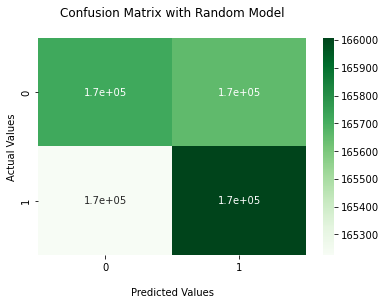

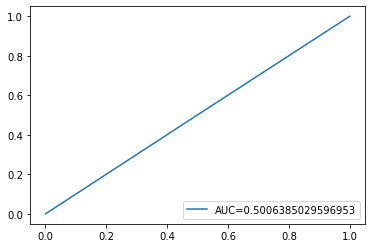

[[317488  13887]
 [315317  15916]]


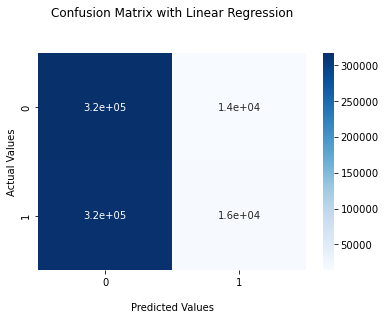

The accuracy of the model is  50.31692946659262
The recall score for the applied algorithm 0.04805076788846522


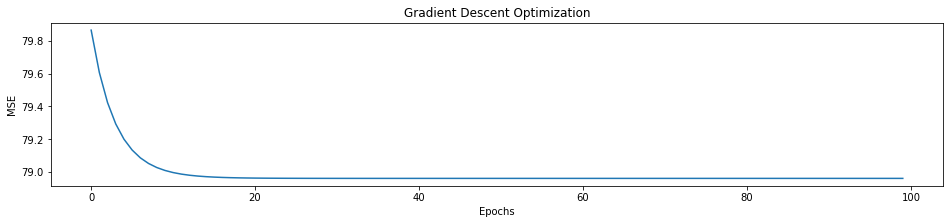

In [2]:
from Group_15_Linear_Classification import RandomModel,Linear_regression

In [4]:
rd= pickle.load(open('random_model.sav', 'rb'))
lr= pickle.load(open('linear_model.sav', 'rb'))
lg =pickle.load(open('logistic_model.sav', 'rb'))
rf= pickle.load(open('randomforest_model.sav', 'rb'))
knn = pickle.load(open('KNN_model.sav', 'rb'))
svc = pickle.load(open('svc_model.sav', 'rb'))
rf_corr = pickle.load(open('randomforest_model_correlation.sav', 'rb'))
svc_corr = pickle.load(open('svm_model_correlation.sav', 'rb'))
rf_sffs = pickle.load(open('randomforest_model_sffs.sav', 'rb'))
svc_sffs = pickle.load(open('svc_model_sffs.sav', 'rb'))

In [5]:
cnn = keras.models.load_model("Group_15_CNN.h5")

In [14]:
df = pd.read_csv("Group_15_Resampled_Data.csv")
df = df.iloc[:,1:]

In [15]:
X = df.drop(['Label-0/1'], axis = 1)
y = df['Label-0/1']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

### Models prediction on test set

In [18]:
rd_pred = rd.predict(X_test)
lr_pred,MSE = lr.predict_lr(X_test)
lg_pred = lg.predict(X_test)
rf_pred = rf.predict(X_test)
knn_pred = knn.predict(X_test)
svc_pred = svc.predict(X_test)

  0%|          | 0/165652 [00:00<?, ?it/s]

In [19]:
X_test_new = X_test[['n_address','interaction_count_income','interaction_length_weight','log_count','sigmoid_looped']]

rf_corr_pred = rf_corr.predict(X_test_new)
svc_corr_pred = svc_corr.predict(X_test_new)


In [20]:
X_test_sfs = X_test[['n_address',
 'gaussian_income',
 'gaussian_neighbors',
 'gaussian_weight',
 'gaussian_length',
 'log_count',
 'day_of_week',
 'quarter_number']]
rf_sffs_pred = rf_sffs.predict(X_test_sfs)
svc_sffs_pred = svc_sffs.predict(X_test_sfs)

In [21]:
print("The accuracy of the Random model is", round(accuracy_score(y_test, rd_pred),2)*100)
print("The accuracy of the Linear Regression is", round(accuracy_score(y_test, lr_pred),2)*100)
print("The accuracy of the Logistic Classification is", round(accuracy_score(y_test, lg_pred),2)*100)
print("The accuracy of the Random Forest is", round(accuracy_score(y_test, rf_pred),2)*100)
print("The accuracy of the KNN is", round(accuracy_score(y_test, knn_pred),2)*100)
print("The accuracy of the SVC is", round(accuracy_score(y_test, svc_pred),2)*100)
print("The accuracy of the Random Forest Correlation is", round(accuracy_score(y_test, rf_corr_pred),2)*100)
print("The accuracy of the SVM Correlation is", round(accuracy_score(y_test, svc_corr_pred),2)*100)
print("The accuracy of the Random Forest sfs is", round(accuracy_score(y_test, rf_sffs_pred),2)*100)
print("The accuracy of the SVM sfs is", round(accuracy_score(y_test, svc_sffs_pred),2)*100)

The accuracy of the Random model is 50.0
The accuracy of the Linear Regression is 50.0
The accuracy of the Logistic Classification is 60.0
The accuracy of the Random Forest is 97.0
The accuracy of the KNN is 95.0
The accuracy of the SVC is 71.0
The accuracy of the Random Forest Correlation is 77.0
The accuracy of the SVM Correlation is 66.0
The accuracy of the Random Forest sfs is 97.0
The accuracy of the SVM sfs is 72.0


In [35]:
cnn.compile(loss='sparse_categorical_crossentropy',
             optimizer="sgd",
             metrics=['accuracy'])

history=cnn.fit(X_test,y_test,batch_size=1000,epochs=30)

Epoch 1/30
166/166 [==============================] - 1s 6ms/step - loss: 0.5939 - accuracy: 0.6701
Epoch 2/30
166/166 [==============================] - 1s 6ms/step - loss: 0.5971 - accuracy: 0.6637
Epoch 3/30
166/166 [==============================] - 1s 7ms/step - loss: 0.5913 - accuracy: 0.6710
Epoch 4/30
166/166 [==============================] - 1s 6ms/step - loss: 0.6019 - accuracy: 0.6591
Epoch 5/30
166/166 [==============================] - 1s 7ms/step - loss: 0.5922 - accuracy: 0.6700
Epoch 6/30
166/166 [==============================] - 1s 6ms/step - loss: 0.5929 - accuracy: 0.6665
Epoch 7/30
166/166 [==============================] - 1s 6ms/step - loss: 0.5967 - accuracy: 0.6613
Epoch 8/30
166/166 [==============================] - 1s 6ms/step - loss: 0.5925 - accuracy: 0.6688
Epoch 9/30
166/166 [==============================] - 1s 6ms/step - loss: 0.5907 - accuracy: 0.6700
Epoch 10/30
166/166 [==============================] - 1s 7ms/step - loss: 0.5934 - accuracy: 0.6683

In [23]:
print("The recall_score of the Random model is", round(recall_score(y_test, rd_pred),2)*100)
print("The recall_score of the Linear Regression is", round(recall_score(y_test, lr_pred),2)*100)
print("The recall_score of the Logistic Classification is", round(recall_score(y_test, lg_pred),2)*100)
print("The recall_score of the Random Forest is", round(recall_score(y_test, rf_pred),2)*100)
print("The recall_score of the KNN is", round(recall_score(y_test, knn_pred),2)*100)
print("The recall_score of the SVC is", round(recall_score(y_test, svc_pred),2)*100)
print("The recall_score of the Random Forest Correlation is", round(recall_score(y_test, rf_corr_pred),2)*100)
print("The recall_score of the SVM Correlation is", round(recall_score(y_test, svc_corr_pred),2)*100)
print("The recall_score of the Random Forest sfs is", round(recall_score(y_test, rf_sffs_pred),2)*100)
print("The recall_score of the SVM sfs is", round(recall_score(y_test, svc_sffs_pred),2)*100)

The recall_score of the Random model is 50.0
The recall_score of the Linear Regression is 5.0
The recall_score of the Logistic Classification is 75.0
The recall_score of the Random Forest is 100.0
The recall_score of the KNN is 98.0
The recall_score of the SVC is 56.00000000000001
The recall_score of the Random Forest Correlation is 66.0
The recall_score of the SVM Correlation is 66.0
The recall_score of the Random Forest sfs is 100.0
The recall_score of the SVM sfs is 56.00000000000001


In [39]:
fpr_rd,tpr_rd,_ = roc_curve(y_test,rd_pred)
auc_rd = round(roc_auc_score(y_test,rd_pred),4)

fpr_lr,tpr_lr,_ = roc_curve(y_test,lr_pred)
auc_lr = round(roc_auc_score(y_test,lr_pred),4)

fpr_lg,tpr_lg,_ = roc_curve(y_test,lg_pred)
auc_lg = round(roc_auc_score(y_test,lg_pred),4)

fpr_rf,tpr_rf,_ = roc_curve(y_test,rf_pred)
auc_rf = round(roc_auc_score(y_test,rf_pred),4)

fpr_knn,tpr_knn,_ = roc_curve(y_test,knn_pred)
auc_knn = round(roc_auc_score(y_test,knn_pred),4)

fpr_svc,tpr_svc,_ = roc_curve(y_test,svc_pred)
auc_svc = round(roc_auc_score(y_test,svc_pred),4)

fpr_rfc,tpr_rfc,_ = roc_curve(y_test,rf_corr_pred)
auc_rfc = round(roc_auc_score(y_test,rf_corr_pred),4)

fpr_sc,tpr_sc,_ = roc_curve(y_test,svc_corr_pred)
auc_sc = round(roc_auc_score(y_test,svc_corr_pred),4)

fpr_rfs,tpr_rfs,_ = roc_curve(y_test,rf_sffs_pred)
auc_rfs = round(roc_auc_score(y_test,rf_sffs_pred),4)

fpr_sfs,tpr_sfs,_ = roc_curve(y_test,svc_sffs_pred)
auc_sfs = round(roc_auc_score(y_test,svc_sffs_pred),4)

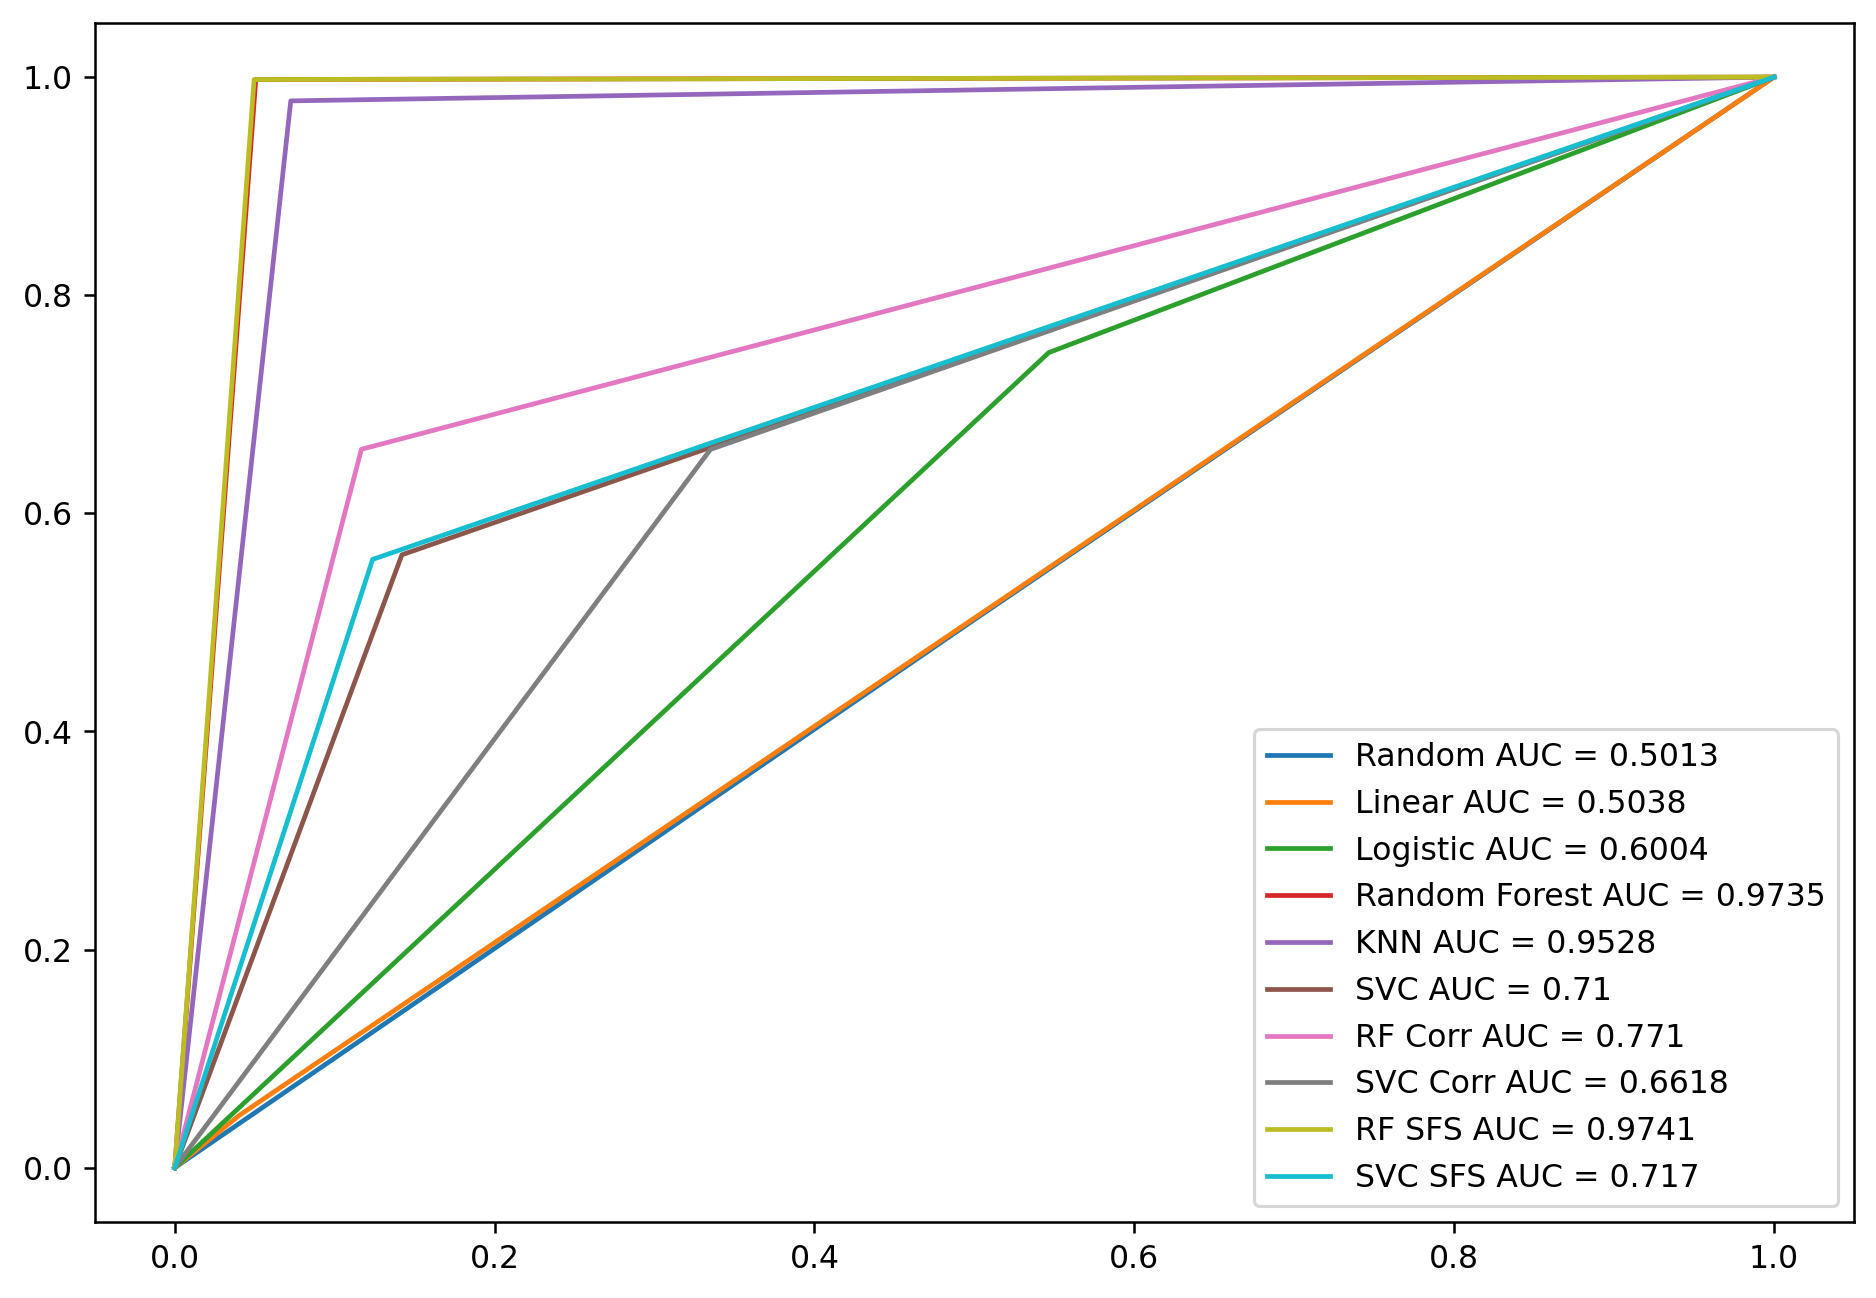

In [43]:
plt.figure(figsize=(10,7))
plt.plot(fpr_rd,tpr_rd,label = "Random AUC = "+str(auc_rd))
plt.plot(fpr_lr,tpr_lr,label = "Linear AUC = "+str(auc_lr))
plt.plot(fpr_lg,tpr_lg,label = "Logistic AUC = "+str(auc_lg))
plt.plot(fpr_rf,tpr_rf,label = "Random Forest AUC = "+str(auc_rf))
plt.plot(fpr_knn,tpr_knn, label = "KNN AUC = "+str(auc_knn))
plt.plot(fpr_svc,tpr_svc, label = "SVC AUC = "+str(auc_svc))
plt.plot(fpr_rfc,tpr_rfc, label = "RF Corr AUC = "+str(auc_rfc))
plt.plot(fpr_sc,tpr_sc, label = "SVC Corr AUC = "+str(auc_sc))
plt.plot(fpr_rfs,tpr_rfs, label = "RF SFS AUC = "+str(auc_rfs))
plt.plot(fpr_sfs,tpr_sfs, label = "SVC SFS AUC = "+str(auc_sfs))
plt.legend(loc = 4)
plt.show()

### Comparing all models with bagging

In [44]:
bg= pickle.load(open('bagging_model.sav', 'rb'))


In [45]:
bg_pred = bg.predict(X_test)

In [46]:
fpr_bg,tpr_bg,_ = roc_curve(y_test,bg_pred)
auc_bg = round(roc_auc_score(y_test,bg_pred),4)

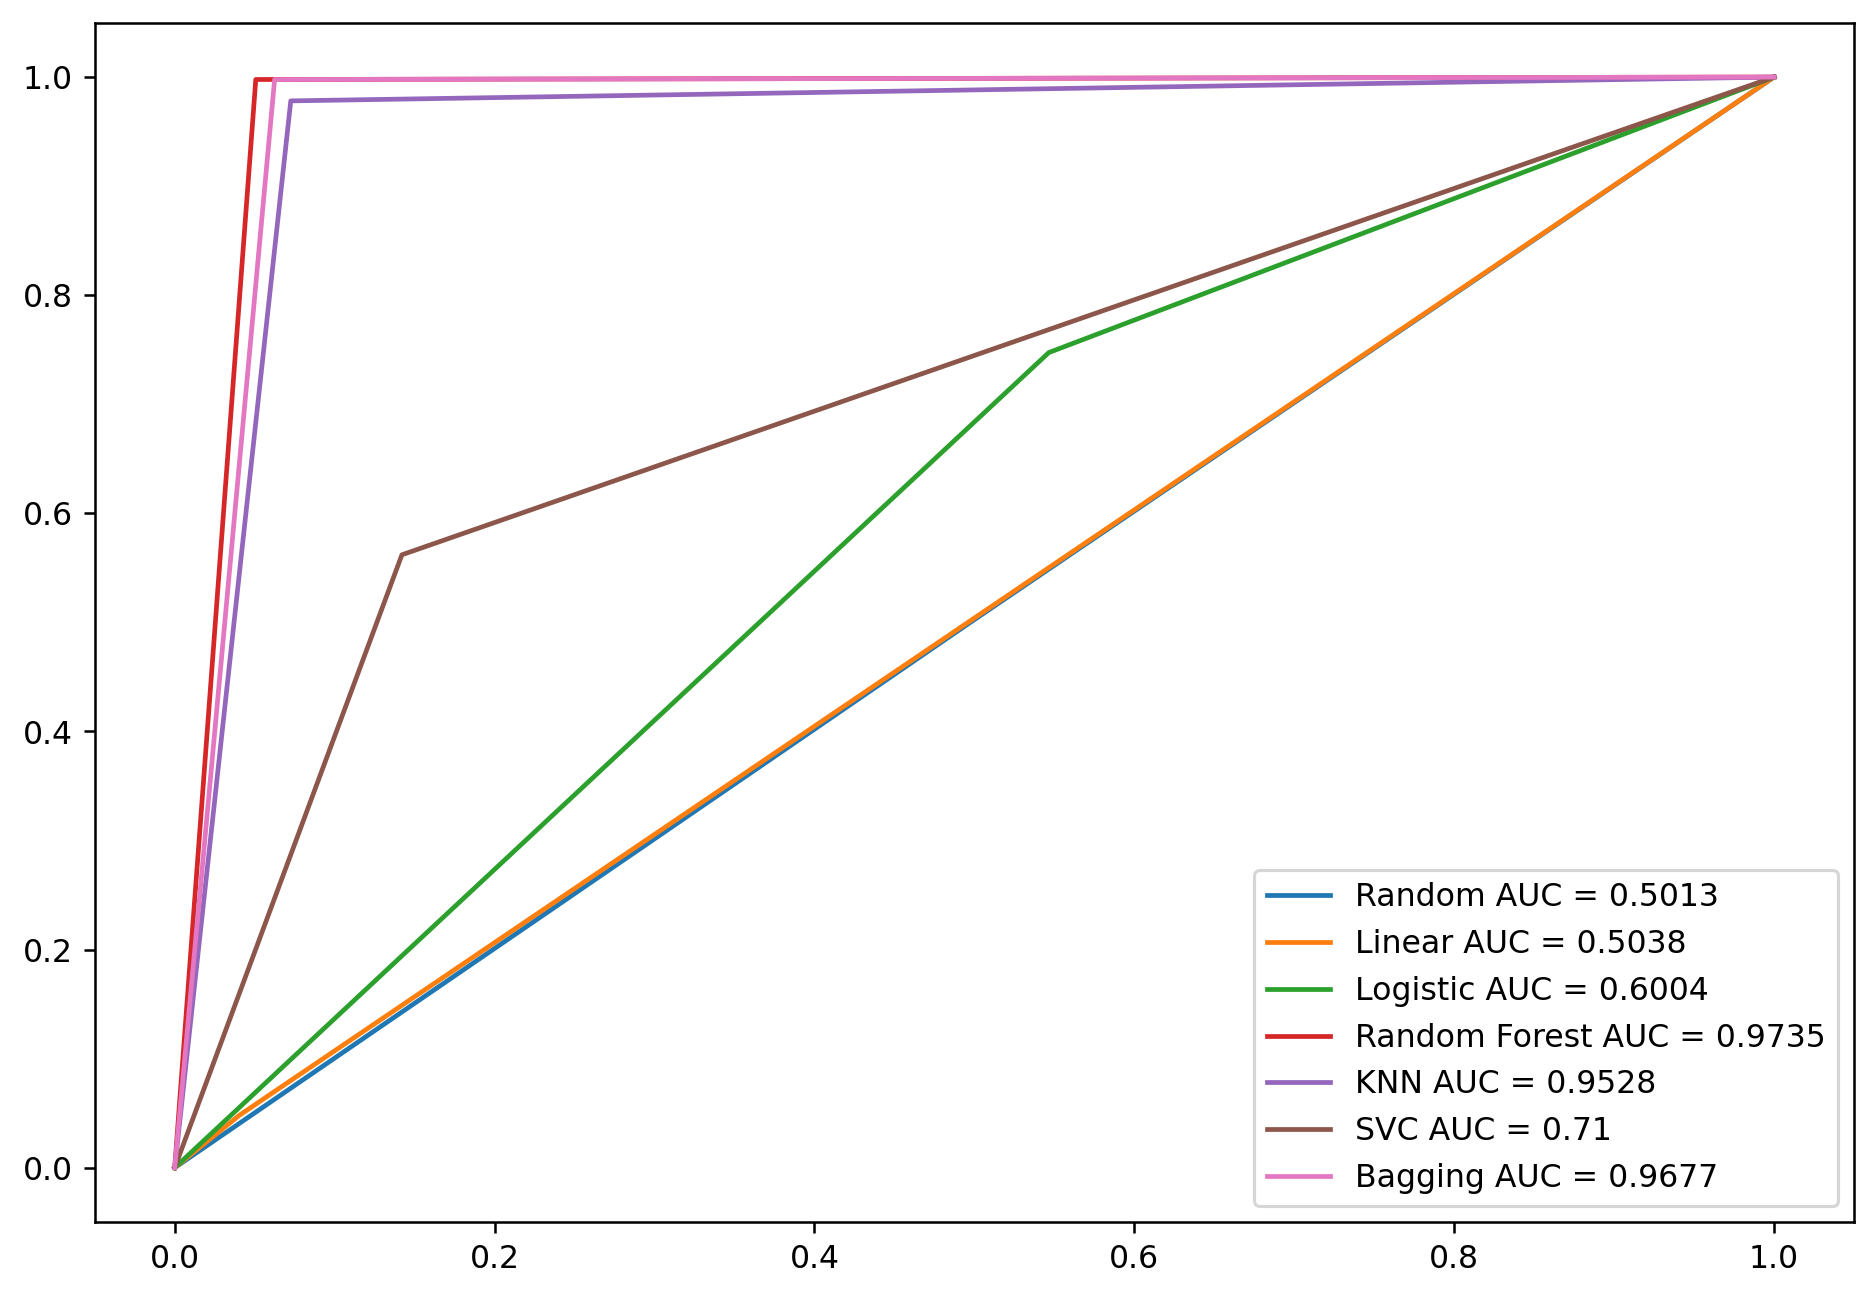

In [48]:
plt.figure(figsize=(10,7))
plt.plot(fpr_rd,tpr_rd,label = "Random AUC = "+str(auc_rd))
plt.plot(fpr_lr,tpr_lr,label = "Linear AUC = "+str(auc_lr))
plt.plot(fpr_lg,tpr_lg,label = "Logistic AUC = "+str(auc_lg))
plt.plot(fpr_rf,tpr_rf,label = "Random Forest AUC = "+str(auc_rf))
plt.plot(fpr_knn,tpr_knn, label = "KNN AUC = "+str(auc_knn))
plt.plot(fpr_svc,tpr_svc, label = "SVC AUC = "+str(auc_svc))
plt.plot(fpr_bg,tpr_bg, label = "Bagging AUC = "+str(auc_bg))
plt.legend(loc = 4)
plt.show()